1. Libraries
2. Import Model
3. Import Processor
4. Prompt, import image
5. Inference

## ***Install Required Libraries***

In [ ]:
!pip install numpy==1.24.4 Pillow==10.3.0 Requests==2.31.0 torch==2.3.0 torchvision==0.18.0 transformers==4.40.2 accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 87.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 91.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 103.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 87.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/

In [ ]:
!mkdir my_models
!mkdir my_models/phi_3_vision

## ***Import Phi-3-vision model***

In [ ]:
from transformers import AutoModelForCausalLM

model_id = "microsoft/Phi-3-vision-128k-instruct"

model = AutoModelForCausalLM.from_pretrained(model_id,
                                             cache_dir="/content/my_models/phi_3_vision",
                                             device_map="cuda",
                                             trust_remote_code=True,
                                             torch_dtype="auto",
                                             _attn_implementation="eager")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/3.66k [00:00<?, ?B/s]

configuration_phi3_v.py:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-vision-128k-instruct:
- configuration_phi3_v.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_phi3_v.py:   0%|          | 0.00/75.4k [00:00<?, ?B/s]

image_embedding_phi3_v.py:   0%|          | 0.00/14.1k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-vision-128k-instruct:
- image_embedding_phi3_v.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-vision-128k-instruct:
- modeling_phi3_v.py
- image_embedding_phi3_v.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


model.safetensors.index.json:   0%|          | 0.00/68.9k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.35G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
# model.config

## ***Get the Processor***

In [ ]:
from transformers import AutoProcessor
processor = AutoProcessor.from_pretrained(model_id, trust_remote_code=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/464 [00:00<?, ?B/s]

processing_phi3_v.py:   0%|          | 0.00/11.3k [00:00<?, ?B/s]

image_processing_phi3_v.py:   0%|          | 0.00/11.4k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-vision-128k-instruct:
- image_processing_phi3_v.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-vision-128k-instruct:
- processing_phi3_v.py
- image_processing_phi3_v.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenizer_config.json:   0%|          | 0.00/9.40k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.85M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/670 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
print(processor.__doc__)


    Constructs a Phi3-V processor which wraps a Phi3-V image processor and a LLaMa tokenizer into a single processor.

    [`Phi3VProcessor`] offers all the functionalities of [`Phi3VImageProcessor`] and [`LlamaTokenizerFast`]. See the
    [`~Phi3VProcessor.__call__`] and [`~Phi3VProcessor.decode`] for more information.

    Args:
        image_processor ([`Phi3VImageProcessor`], *optional*):
            The image processor is a required input.
        tokenizer ([`LlamaTokenizerFast`], *optional*):
            The tokenizer is a required input.
    


## ***Create Prompt***

In [ ]:
messages = [
    {"role": "user", "content": "<|image_1|>\n What color is the clock?"}
]

prompt = processor.tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)

In [ ]:
prompt

'<|user|>\n<|image_1|>\n What color is the clock?<|end|>\n<|assistant|>\n'

## ***Fetch Input Image***

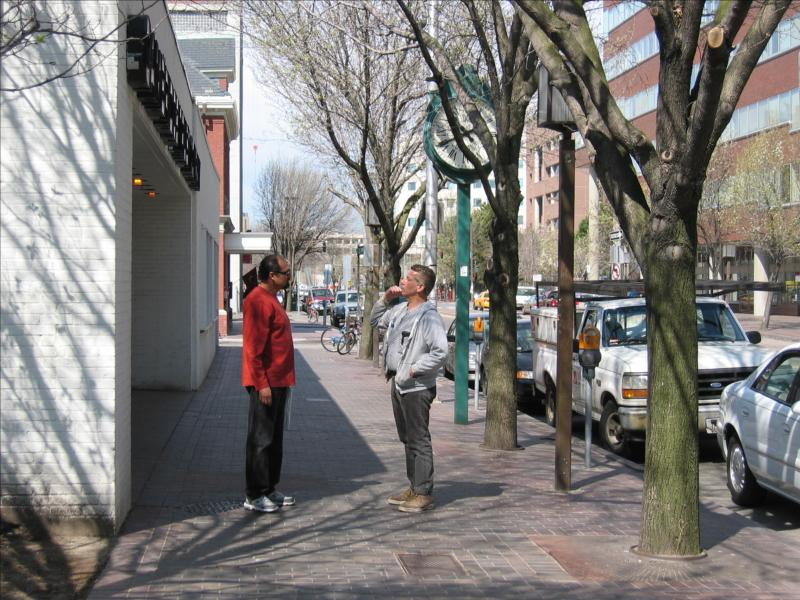

In [ ]:
from PIL import Image
import requests

url = "https://cs.stanford.edu/people/rak248/VG_100K_2/1.jpg"
image = Image.open(requests.get(url, stream=True).raw)
image

## ***Convert Inputs to Tokens***

In [ ]:
inputs = processor(prompt, [image], return_tensors="pt").to("cuda:0")

In [ ]:
#inputs

{'input_ids': tensor([[    1, 32010, 29871,  ..., 29871,    13, 32001]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1]], device='cuda:0'), 'pixel_values': tensor([[[[[-0.4866,  0.0120,  0.0814,  ..., -0.0327,  0.0900,  0.0522],
           [-0.1796,  0.8149,  1.0950,  ...,  0.2734,  0.4536,  0.3788],
           [-0.1385,  0.9728,  1.6060,  ...,  0.0471,  0.3026,  0.3259],
           ...,
           [-1.1075, -0.9004, -0.8931,  ...,  0.7552,  0.8268,  0.8806],
           [-1.1705, -1.1280, -1.0829,  ...,  0.6762,  0.7784,  0.8441],
           [-1.1997, -1.1864, -1.1426,  ...,  0.6092,  0.6603,  0.6749]],

          [[-0.4384,  0.0713,  0.1576,  ..., -0.2448, -0.2025, -0.2537],
           [-0.1242,  0.9146,  1.1997,  ...,  0.0310,  0.1323,  0.0371],
           [-0.0670,  1.0755,  1.7414,  ..., -0.2813, -0.0576, -0.0473],
           ...,
           [-1.1007, -0.8863, -0.9028,  ...,  0.5966,  0.6703,  0.7256],
           [-1.1729, -1.1293, -1.1082,  ...,  0.5155,  0.6

In [ ]:
generation_args = {
    "max_new_tokens": 500,
    "num_return_sequences": 2
}

## ***Inference***

In [ ]:
%%time
generate_ids = model.generate(**inputs, eos_token_id=processor.tokenizer.eos_token_id, **generation_args)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:492: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.5` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/root/.cache/huggingface/modules/transformers_modules/microsoft/Phi-3-vision-128k-instruct/c45209e90a4c4f7d16b2e9d48503c7f3e83623ed/image_embedding_phi3_v.py:197: UserWarning: Phi-3-V modifies `input_ids` in-place and the tokens indicating images will be removed after model forward. If your workflow requires multiple forward passes on the same `input_ids`, please make a copy of `input_ids` before passing it to the model.
  warnings.warn(


CPU times: user 10.8 s, sys: 131 ms, total: 10.9 s
Wall time: 11.7 s


In [ ]:
# remove input tokens
generate_ids = generate_ids[:, inputs['input_ids'].shape[1]:]
response = processor.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]

print(response)

The clock is green.


In [ ]:
messages = [
    {"role": "system", "content":("Respond to the following user query in a comprehensive and detailed way.But first write down"
            " your internal thoughts. This must include your draft response and its evaluation. After this,"
              " write your final response after '<R>'")},
    {"role": "user", "content": "<|image_1|>\n What color is the clock?"}
]

prompt = processor.tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)

prompt

"<|system|>\nRespond to the following user query in a comprehensive and detailed way.But first write down your internal thoughts. This must include your draft response and its evaluation. After this, write your final response after '<R>'<|end|>\n<|user|>\n<|image_1|>\n What color is the clock?<|end|>\n<|assistant|>\n"

In [ ]:
messages = [
    {"role": "system", "content": "<|image_1|>\n Respond to the following user query in a comprehensive and detailed way. You can write down your thought process before responding. Write your thoughts after “Here is my thought process:” and write your response after “Here is my response:”."},
    {"role": "user", "content": "What color is the clock?"}
]

prompt = processor.tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)

inputs = processor(prompt, [image], return_tensors="pt").to("cuda:0")


generate_ids = model.generate(**inputs, eos_token_id=processor.tokenizer.eos_token_id, **generation_args)
# remove input tokens
generate_ids = generate_ids[:, inputs['input_ids'].shape[1]:]
response = processor.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)

print(response[0])
print(response[1])

/root/.cache/huggingface/modules/transformers_modules/microsoft/Phi-3-vision-128k-instruct/c45209e90a4c4f7d16b2e9d48503c7f3e83623ed/image_embedding_phi3_v.py:197: UserWarning: Phi-3-V modifies `input_ids` in-place and the tokens indicating images will be removed after model forward. If your workflow requires multiple forward passes on the same `input_ids`, please make a copy of `input_ids` before passing it to the model.
  warnings.warn(


['\nHere is my thought process: The image shows a person talking to another person, who appears to be walking up from below. They are standing next to some trees, and there are buildings and parked cars in the background. The color of the clock is not visible due to the angle at which I am taking the photo or the position of the people themselves.\n\nHere is my response: The color of the clock cannot be determined as it is not visible in the given image due to the perspective from which the photo was taken.', "Here is my thought process: To answer the user's question about the color of the clock, I need to look at the image and identify the clock object. Once I find the clock, I will describe its color as accurately as possible based on the image.\n\nHere is my response: The clock in the image is green."]


In [ ]:
print(response[0])
print(response[1])


Here is my thought process: I need to identify the location of the clock first, look at its surroundings to deduce possible colors, then articulate the color of the clock based on that information.


Here is my response: The clock in the image is green. I arrived at this conclusion by noticing the green lines and the color in the center of the clock as it stands against the backdrop of an urban environment with brick buildings and parked vehicles.
Here is my thought process: the clock is described as being outdoors, and since the weather is sunny and there is a clear sky, it is likely that the clock is on a post outside a building.

Here is my response: The clock has a green frame and is attached to a green pole. It's located outdoors.


The clock is green.
